In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import torch 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

best_loss ={}
dfs = {}
params = {'axes.labelsize': 20,
          'axes.titlesize': 30,
         }
plt.rcParams.update(params)

In [2]:
def get_agg_data(names, curve_type='train', model='vgg11', dataset='cifar10'):
    folder_path = './logs/{}/{}'.format(dataset, model)
    paths = [os.path.join(folder_path, name) for name in names]  
    curves = {name: torch.load(fp) for name, fp in zip(names, paths)}#get_data(names[opt])  
    df_agg = pd.DataFrame({ key : value[curve_type +'_acc'] for key, value in curves.items()})
    return df_agg

def agg_plot(names, curve_type='train', model='vgg11', labels = None, ylim=(80,101), loc = 'upper left', figsize=(10,8), dataset='cifar10'):
    plt.figure(figsize=figsize)
    plt.ylim(ylim)
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
        df_agg = get_agg_data(names[opt], curve_type, model, dataset=dataset)        
        acc = np.array(df_agg.mean(axis=1))
        std = np.array(df_agg.std(axis=1))    
        x = range(1, len(acc)+1)
        if 'sghmc' in label.lower():
            plt.plot(x, acc, '-', label=label, linewidth=2)
        else: 
            plt.plot(x, acc, '--', label=label, linewidth=2)
        plt.fill_between(x, acc-std, acc+std, alpha=0.15)
  
    plt.legend(fontsize=25, loc=loc)
    plt.grid()
    plt.title('{} ACCURACY'.format(curve_type.upper()))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(fontsize =20)
    plt.yticks(fontsize =20)
    plt.tight_layout()
    plt.savefig('SLFN.png')
    plt.show()

def get_best_acc(names, curve_type='train', model='vgg11', labels = None, dataset='cifar10'):  
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
        df_agg = get_agg_data(names[opt], curve_type, model, dataset)
        print(opt, df_agg.max(axis=0).mean(), df_agg.max(axis=0).std())

### **SLFN**



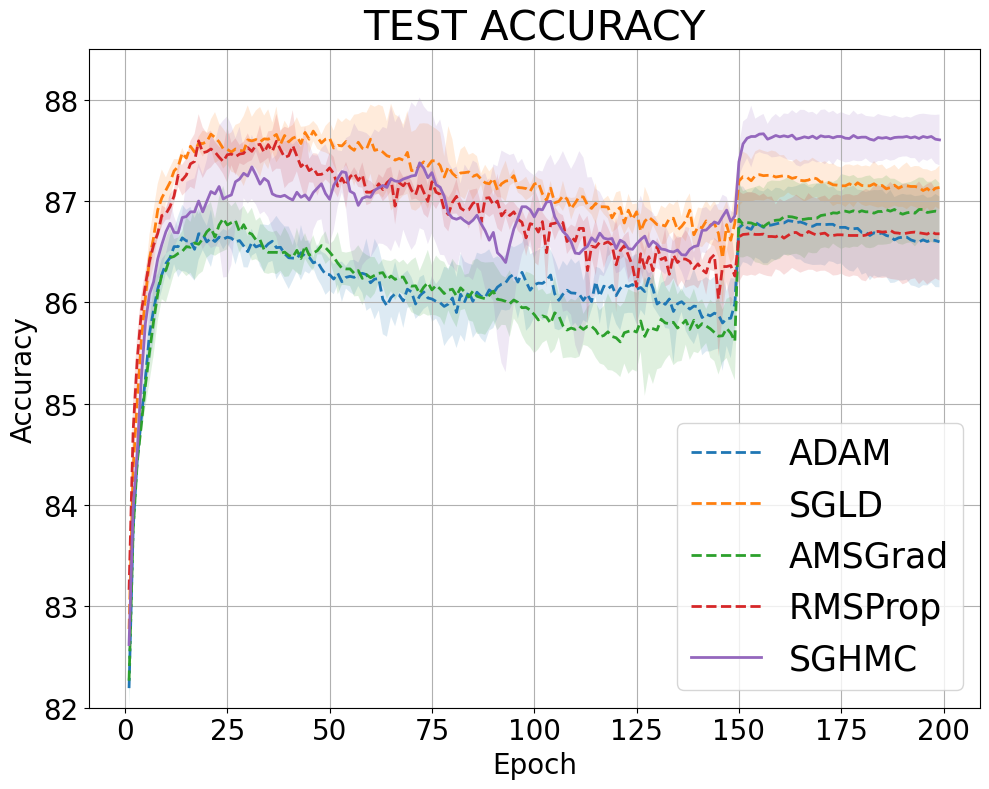

adam 87.02666666666666 0.02886751345947965
sgld 87.81333333333333 0.181475434517549
amsgrad 87.12666666666667 0.22188585654190474
rmsprop 87.69666666666667 0.22143471573656562
sghmc 87.86666666666667 0.058594652770823624


In [4]:
names = {'adam':['f_mnist-adam-slfn-seed111-lr0.001-betas0.9-0.999-wdecay1e-05',                                   
                 'f_mnist-adam-slfn-seed222-lr0.001-betas0.9-0.999-wdecay1e-05',                                   
                 'f_mnist-adam-slfn-seed333-lr0.001-betas0.9-0.999-wdecay1e-05',                                   
          ],       
         'sgld':['f_mnist-sgld-slfn-seed111-lr0.1-wdecay0',                      
                  'f_mnist-sgld-slfn-seed222-lr0.1-wdecay0',                     
                  'f_mnist-sgld-slfn-seed333-lr0.1-wdecay0',                     
         ],   
         'amsgrad':['f_mnist-amsgrad-slfn-seed111-lr0.001-betas0.9-0.999-wdecay1e-05',                     
                    'f_mnist-amsgrad-slfn-seed222-lr0.001-betas0.9-0.999-wdecay1e-05',                     
                    'f_mnist-amsgrad-slfn-seed333-lr0.001-betas0.9-0.999-wdecay1e-05',                     
         ],
         'rmsprop':['f_mnist-rmsprop-slfn-seed111-lr0.001-wdecay1e-05',
                    'f_mnist-rmsprop-slfn-seed222-lr0.001-wdecay1e-05',
                    'f_mnist-rmsprop-slfn-seed333-lr0.001-wdecay1e-05',
         ],
         'sghmc':['f_mnist-sghmc-slfn-seed111-lr0.05-gamma0.5-beta1.0e+12-wdecay0',                      
                  'f_mnist-sghmc-slfn-seed222-lr0.05-gamma0.5-beta1.0e+12-wdecay0',                     
                  'f_mnist-sghmc-slfn-seed333-lr0.05-gamma0.5-beta1.0e+12-wdecay0',                     
         ],  
        }
labels = ['ADAM',
          'SGLD',
          'AMSGrad',          
          'RMSProp',
          'SGHMC'
         ]
model = 'slfn'
dataset = 'f_mnist'
agg_plot(names, dataset=dataset, curve_type='test', model=model, labels=labels, ylim = (82, 88.5), loc='lower right') 
get_best_acc(names, dataset=dataset, curve_type='test', model=model, labels=labels) 

